In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [13]:
titanic.isnull().head()  #to check whether the data consist of Nan value

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


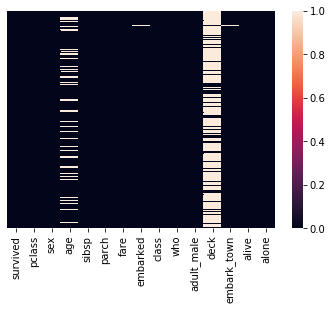

In [12]:
sns.heatmap(titanic.isnull(),yticklabels=False) #this shows the Nan values presence in each column. #white color shows the Nan values in the columns.

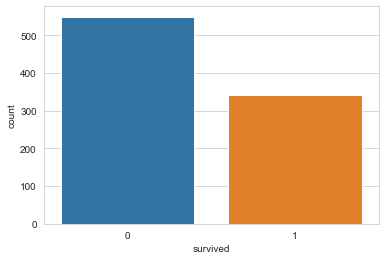

In [17]:
sns.countplot(x='survived',data=titanic)  #count plot to visualize the no of passengers survived vs dead.
sns.set_style('whitegrid')

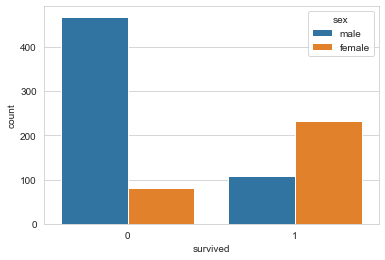

In [20]:
sns.countplot(x='survived',hue='sex',data=titanic) #plotting the graph of survived data as per the sex.

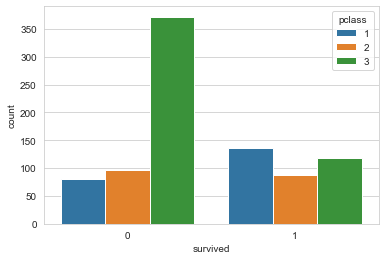

In [21]:
sns.countplot(x='survived',hue='pclass',data=titanic) #plotting the graph of survived vs passenger class

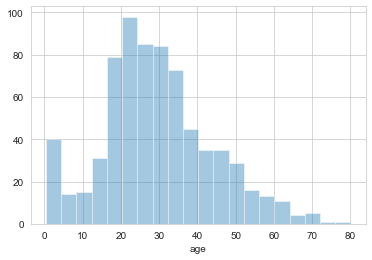

In [25]:
sns.distplot(titanic['age'].dropna(),kde=False)  

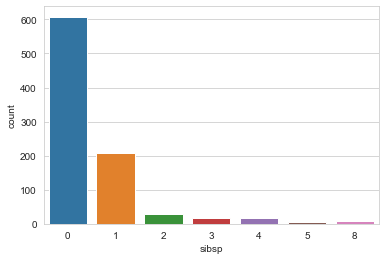

In [26]:
sns.countplot(x='sibsp',data=titanic) #plottig the count plot for the count of siblings & spouse.

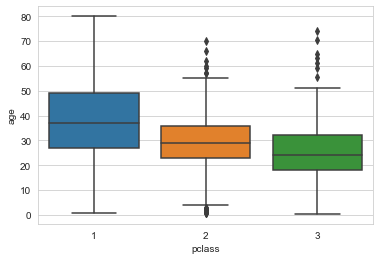

In [28]:
sns.boxplot(x='pclass',y='age',data=titanic) #plotting the box plot tofind out the average age for each passenger class.

#### To create a function to replace the Nan values from the age column & replace it with average age as per each class.

In [33]:
def replace_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else: 
            return 24
    else:
        return age

In [34]:
titanic['age']=titanic[['age','pclass']].apply(replace_age,axis=1)

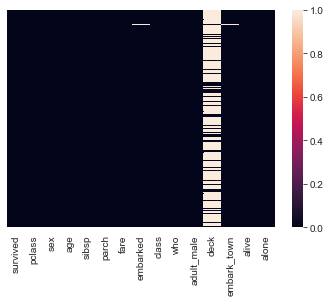

In [37]:
sns.heatmap(titanic.isnull(),yticklabels=False) #here we can observe the age column has no Nan value. we replaced it with average age.

In [45]:
titanic.drop('deck',axis=1,inplace=True) #we dropped deck column for now because it contains more than 80% Nan values.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,24.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


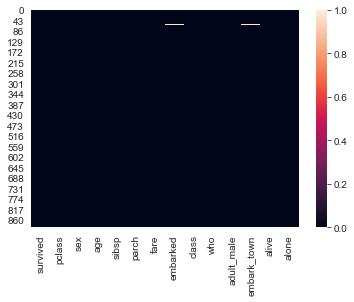

In [61]:
sns.heatmap(titanic.isnull()) #we have still some Nan values in embarked & embarked_town column.

In [62]:
titanic[['embarked','embark_town']].dropna().inplace=True

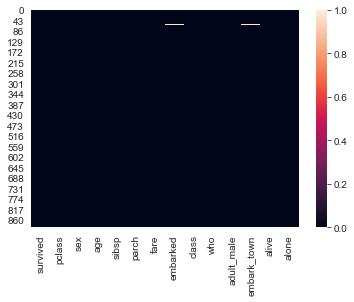

In [63]:
sns.heatmap(titanic.isnull())